In [1]:
import pandas as pd

In [2]:
crypto_data = pd.read_csv("crypto_data.csv")
crypto_data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
first_crypto_data = crypto_data.loc[(crypto_data["IsTrading"]==True)].drop(columns=["IsTrading"]).dropna()
first_crypto_data

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
second_crypto_data = first_crypto_data.loc[(first_crypto_data["TotalCoinsMined"]>=0)]
second_crypto_data = second_crypto_data.drop(columns=["CoinName"])

In [5]:
second_crypto_data

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [6]:
second_crypto_data["Algorithm"].unique()

array(['Scrypt', 'SHA-256', 'X13', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NIST5', 'NeoScrypt', 'SHA3', 'HybridScryptHash256',
       'Scrypt-n', 'PHI1612', 'Lyra2REv2', 'CryptoNight', 'Shabal256',
       'Counterparty', 'Momentum', 'Stanford Folding', 'QuBit', 'M7 POW',
       'Lyra2RE', 'QUAIT', 'vDPOS', 'Blake2b', 'BLAKE256',
       '1GB AES Pattern Search', 'Blake', 'Dagger', 'CryptoNight-Lite',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Keccak', 'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'Time Travel', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'SkunkHash',
       'C11', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Zhash', 'C

In [7]:
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
pd.get_dummies(second_crypto_data, columns=['Algorithm', 'ProofType'])

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,808,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
scaler = StandardScaler()

In [10]:
df = scaler.fit_transform(pd.get_dummies(second_crypto_data, columns=['Algorithm', 'ProofType']).drop(columns=["Unnamed: 0"]))

In [11]:
df

array([[-0.10312268, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.07692584, -0.03826624, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10312268, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       ...,
       [-0.07878691, -0.03826599, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10294153, -0.03826638, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10311949, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394]])

In [12]:
pca = PCA(n_components=0.90)
shopping_pca = pca.fit_transform(df)

In [13]:
shopping_pca

array([[-2.26762689e-01, -1.24705557e+00, -4.43753230e-01, ...,
        -5.71643148e-13, -1.23584257e-12, -2.69002591e-13],
       [-2.12357604e-01, -1.24562956e+00, -4.44385788e-01, ...,
        -5.72666660e-13, -1.23664781e-12, -2.68895646e-13],
       [-1.56176296e-01, -8.29298911e-01, -2.73512718e-01, ...,
         1.03019969e-14, -1.07436172e-14,  5.33231047e-15],
       ...,
       [-1.25952025e-01,  2.31596970e+00,  2.48549384e-01, ...,
         2.15831611e-14, -6.01546007e-14,  7.26073269e-14],
       [-2.81850828e-01,  2.03177848e+00,  2.30315053e-01, ...,
        -5.73977699e-13, -1.23398004e-12, -2.69159701e-13],
       [-8.87009730e-02, -7.81973220e-01, -1.81555123e-01, ...,
        -5.75664022e-13, -1.23216944e-12, -2.67451985e-13]])

In [14]:
pd.DataFrame(data=shopping_pca)

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-0.226763,-1.247056,-0.443753,-3.908918e-10,-1.072836e-10,-1.325188e-10,-5.757527e-08,0.001952,-1.113359,-0.290471,...,7.836404e-13,7.636643e-15,6.805437e-14,-3.220105e-13,6.982732e-13,7.454639e-13,-5.251946e-13,-5.716431e-13,-1.235843e-12,-2.690026e-13
1,-0.212358,-1.245630,-0.444386,-3.908918e-10,-1.072833e-10,-1.325188e-10,-5.757528e-08,0.000574,-1.116438,-0.291084,...,7.831990e-13,8.433306e-15,6.789820e-14,-3.216680e-13,6.987494e-13,7.450157e-13,-5.249027e-13,-5.726667e-13,-1.236648e-12,-2.688956e-13
2,-0.156176,-0.829299,-0.273513,-2.889945e-10,-7.931580e-11,-9.797336e-11,-4.256547e-08,-0.009525,-0.627418,-0.092659,...,3.630695e-15,1.008361e-14,2.114865e-15,3.667128e-16,7.551915e-15,1.433979e-14,-1.498455e-14,1.030200e-14,-1.074362e-14,5.332310e-15
3,0.286000,-1.982529,-0.480747,-5.750445e-10,-1.578212e-10,-1.949472e-10,-8.469621e-08,-0.043232,-0.829931,-0.235206,...,7.836125e-14,8.433716e-14,6.487986e-14,8.006520e-16,6.880329e-16,-1.492947e-14,1.055043e-14,-3.322685e-14,-1.085251e-14,-6.512766e-14
4,-0.211787,1.470995,0.116681,2.294213e-10,6.296250e-11,7.777493e-11,3.378875e-08,-0.001314,0.063770,0.080055,...,6.307485e-15,1.513653e-14,4.220995e-15,-5.468536e-16,9.442305e-15,1.178543e-14,-1.311529e-14,6.288329e-15,-8.535133e-15,2.824842e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,4.073327,0.150109,-0.139943,-1.084508e-10,-2.975311e-11,-3.675974e-11,-1.597617e-08,-1.080804,0.741688,0.230250,...,7.244106e-15,1.551163e-14,4.227287e-15,1.615903e-15,9.483469e-15,1.063717e-14,-1.255575e-14,1.369824e-14,-4.692988e-15,5.283783e-15
680,-0.226559,-1.247035,-0.443762,-3.908917e-10,-1.072834e-10,-1.325188e-10,-5.757527e-08,0.001933,-1.113403,-0.290480,...,7.832746e-13,8.219866e-15,6.780800e-14,-3.217054e-13,6.987002e-13,7.450375e-13,-5.250166e-13,-5.722405e-13,-1.236457e-12,-2.688882e-13
681,-0.125952,2.315970,0.248549,4.409403e-10,1.210133e-10,1.494811e-10,6.494157e-08,0.004794,-0.011884,0.141240,...,-4.289149e-14,-1.618663e-14,-7.058780e-15,1.126682e-14,-7.871376e-15,2.481800e-14,-1.995621e-14,2.158316e-14,-6.015460e-14,7.260733e-14
682,-0.281851,2.031778,0.230315,3.822438e-10,1.049036e-10,1.295839e-10,5.629695e-08,0.022867,0.160935,0.148707,...,7.888768e-13,1.103840e-14,6.984162e-14,-3.231867e-13,7.041974e-13,7.405616e-13,-5.266219e-13,-5.739777e-13,-1.233980e-12,-2.691597e-13


In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(learning_rate=35)

In [17]:
tsne_feature = tsne.fit_transform(pd.DataFrame(data=shopping_pca))

In [18]:
tsne_feature.shape

(684, 2)

In [19]:
tsne_feature

array([[ 14.9275675,   4.799262 ],
       [ 18.953802 ,  -1.0975307],
       [  2.968507 ,  23.75976  ],
       ...,
       [  4.509893 , -29.63091  ],
       [-15.434568 , -17.39141  ],
       [-10.355834 ,   7.0900407]], dtype=float32)

In [20]:
pd.DataFrame(tsne_feature)

,0,1
0,14.927567,4.799262
1,18.953802,-1.097531
2,2.968507,23.759760
3,30.126247,16.562788
4,-1.169087,28.701668
...,...,...
679,-0.505848,4.589832
680,21.011705,4.592571
681,4.509893,-29.630911
682,-15.434568,-17.391411


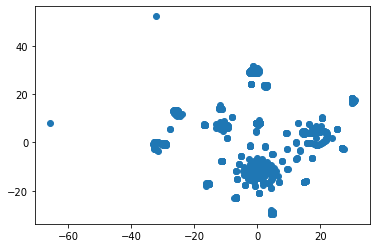

In [21]:
plt.scatter(pd.DataFrame(tsne_feature)[0], pd.DataFrame(tsne_feature)[1])

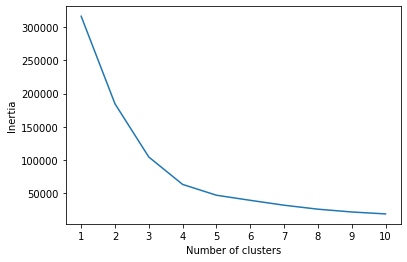

In [22]:
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pd.DataFrame(tsne_feature))
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Based on my findings, cryptocurrencies can be cluster into 4 distinct groups as proven with the dataset provided.